# Feature Engineering  
In this study, feature engineering is performed on the data set of a Kaggle project "House Prices: Advanced Regression Techniques" (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Exploratory data analysis (EDA) was done in the file "House_price_EDA". The insight obtained from EDA is utilized here to do effective feature engineeing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('./data/train.csv')
train_size = len(train)
test = pd.read_csv('./data/test.csv')

In [3]:
# concatinating train and test data for overall feature engineering
data = pd.concat([train, test], axis = 0).reset_index(drop = True)
print('Overall data shape: {}\n'.format(data.shape))
data.head()

Overall data shape: (2919, 81)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
# droping the Id column and SalePrice column
data.drop(['Id', 'SalePrice'], axis = 1, inplace= True)

## 1. Handling Missing Values   
To know which features have missing values and what the percentage of missing values is, please refer to the exploratory data analysis part (file name: "House_price_EDA"). The graph showing the features with missing values and the %age of the missing values is shown here again.


[Text(0, 0.5, '% age of missing values'),
 Text(0.5, 0, 'All features with missing values'),
 Text(0.5, 1.0, '% age of Missing Values')]

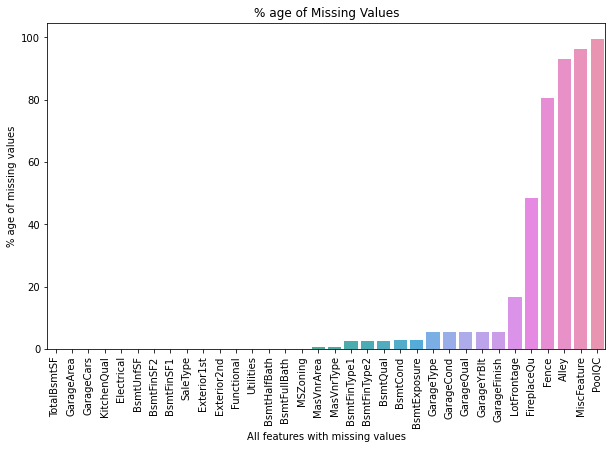

In [5]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percent = ( missing/(len(data)) )*100
missing_percent = missing_percent.sort_values()
plt.figure(figsize = (10,6))
g = sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)
g.set(xlabel = 'All features with missing values', ylabel = '% age of missing values', title = '% age of Missing Values')

### 1.1. Categorical Features   
The above figure shows that there are some features which have missing values even more than 50 %. But by looking at the data desription at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data, missing values of most of the categorical features mean that the feature did not exist for that particular house. For example, missing value of 'BsmtQual' means that basement did not exist in that particular house. So, for these missing values, we can introduce new category 'N/A'.


In [6]:
# get the categorical features having missing values
missing_cat_feats = [i for i in missing_percent.index if data[i].dtype == 'O']
print('Categorical features with missing values are:\n\n', missing_cat_feats)
# replace the missing values with 'N/A'
data[missing_cat_feats] = data[missing_cat_feats].fillna('N/A')
print('\nMissing values of the categorical features have been handled....')

Categorical features with missing values are:

 ['KitchenQual', 'Electrical', 'SaleType', 'Exterior1st', 'Exterior2nd', 'Functional', 'Utilities', 'MSZoning', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']

Missing values of the categorical features have been handled....


### 1.2. Numerical Features

Numerical features with missing values are:

 ['TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtHalfBath', 'BsmtFullBath', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage']


[Text(0, 0.5, '% age of missing values'),
 Text(0.5, 0, 'Numerical features with missing values'),
 Text(0.5, 1.0, '% age of Missing Values')]

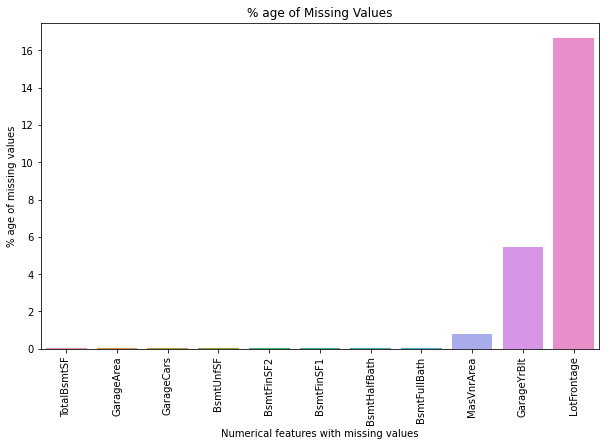

In [7]:
missing_num_feats = [i for i in missing_percent.index if data[i].dtype != 'O']
print('Numerical features with missing values are:\n\n', missing_num_feats)

plt.figure(figsize = (10,6))
g = sns.barplot(x = missing_num_feats, y = missing_percent.loc[missing_num_feats])
plt.xticks(rotation = 90)
g.set(xlabel = 'Numerical features with missing values', ylabel = '% age of missing values', title = '% age of Missing Values')

By looking at the above plot, all the numerical features have missing values less than 2 % except 'GarageYrBlt' and 'LotFrontage'. We can replace the missing values with the median value of the corresponding column. For each of the features of 'GarageYrBlt' and 'LotFrontage', we will add one new binary feature which will have value of 1 at the index where the original feature had a missing value. This can help the model to obtain the information in a better way.

In [8]:
miss_num_feats_subset = [ 'GarageYrBlt', 'LotFrontage']

for feat in missing_num_feats:
    median_val = data[feat].median()
    if feat in miss_num_feats_subset:
        data[feat+'_NaN'] = np.where(data[feat].isnull(), 1, 0)
    data[feat].fillna(median_val, inplace = True)

Till this point, all the missing values have been handles. This can be confirmed in the following cell.

In [9]:
missing = data.isnull().sum()
missing = missing[missing > 0]
print('List containing the features having missing values is:\n\n', list(missing))

List containing the features having missing values is:

 []


In [10]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_NaN,LotFrontage_NaN
0,60,RL,65.0,8450,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,N/A,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,N/A,N/A,N/A,0,2,2008,WD,Normal,0,0
1,20,RL,80.0,9600,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,N/A,N/A,N/A,0,5,2007,WD,Normal,0,0
2,60,RL,68.0,11250,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,N/A,N/A,N/A,0,9,2008,WD,Normal,0,0
3,70,RL,60.0,9550,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,N/A,N/A,N/A,0,2,2006,WD,Abnorml,0,0
4,60,RL,84.0,14260,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,N/A,N/A,N/A,0,12,2008,WD,Normal,0,0


## 2. Transformation of the Continuous Numerical Features  
It is obvious from the exploratory data analysis part that the continuous numerical features did not have a Normal distribution. This can be resolved by applying log transformation. Moreover, the scale of different features was not similar. For that, feature scaling can be used.

In [11]:
# getting all the numerical features
all_num_feats = [col for col in data.columns if data[col].dtype != 'O']

# getting temporal features. As described in the data, the temporal features have 'Year' or 'Yr' in their label.
temporal_feats = [col for col in all_num_feats if ('Year' in col or 'Yr' in col)]

# to flag a numerical feature as continuous, we make an assumption that it should have greater than 20 unique values
continuous_num_feats = [col for col in all_num_feats if ( data[col].value_counts().count() > 20 and col not in temporal_feats)]

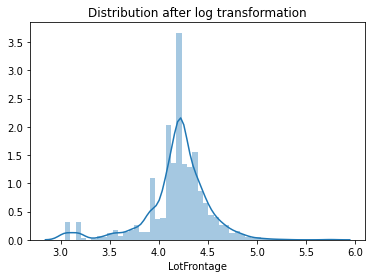

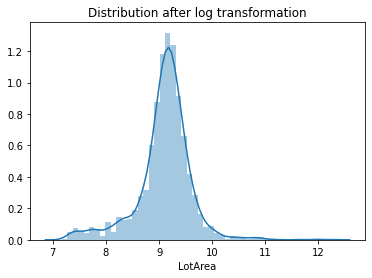

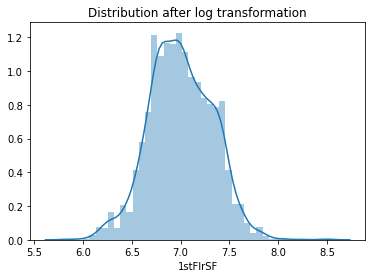

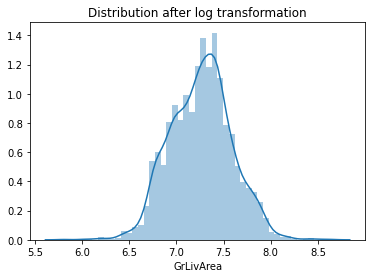

In [12]:
# aplly log transformation to the continuous features and also to the target variable 'SalePrice'
# do not apply log transformation to the features which contain 0 as a value 
for feat in continuous_num_feats:
    if 0 not in data[feat].values:
        data[feat] = np.log(data[feat])
        plt.figure()
        g = sns.distplot(data[feat])
        g.set(title = 'Distribution after log transformation')

[Text(0.5, 1.0, 'Distribution after log transformation')]

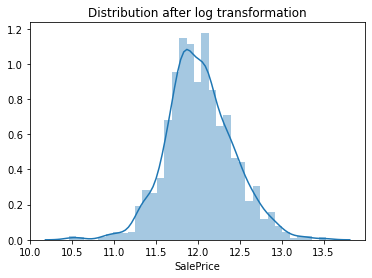

In [13]:
# applying log transformation to target feature 'SalePrice'
train.SalePrice = np.log(train.SalePrice)
plt.figure()
g = sns.distplot(train.SalePrice)
g.set(title = 'Distribution after log transformation')

### 2.1. Rescale the Continuous Numerical Features

In [14]:
scalar = StandardScaler()
scalar.fit(data[continuous_num_feats])
data[continuous_num_feats] = pd.DataFrame( scalar.transform(data[continuous_num_feats]), columns = continuous_num_feats)
    

In [15]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_NaN,LotFrontage_NaN
0,60,RL,-0.037013,-0.103678,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.529034,Gd,TA,PConc,Gd,TA,No,GLQ,0.580959,Unf,-0.293025,-0.934782,-0.444278,GasA,Ex,Y,SBrkr,-0.777202,1.207379,-0.101197,0.564688,1.0,0.0,2,1,3,1,Gd,8,Typ,0,N/A,Attchd,2003.0,RFn,2.0,0.348888,TA,TA,Y,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,0,N/A,N/A,N/A,-0.089592,2,2008,WD,Normal,0,0
1,20,RL,0.598190,0.146571,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.567016,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.178162,Unf,-0.293025,-0.629818,0.477158,GasA,Ex,Y,SBrkr,0.424972,-0.785025,-0.101197,-0.370255,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,-0.059804,TA,TA,Y,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,0,N/A,N/A,N/A,-0.089592,5,2007,WD,Normal,0,0
2,60,RL,0.101018,0.457635,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.338903,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.097928,Unf,-0.293025,-0.288441,-0.299027,GasA,Ex,Y,SBrkr,-0.553903,1.235375,-0.101197,0.698515,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,0.627542,TA,TA,Y,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,0,N/A,N/A,N/A,-0.089592,9,2008,WD,Normal,0,0
3,70,RL,-0.281877,0.136329,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.567016,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.494884,Unf,-0.293025,-0.047201,-0.671232,GasA,Gd,Y,SBrkr,-0.418875,0.978742,-0.101197,0.577260,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,0.785446,TA,TA,Y,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,0,N/A,N/A,N/A,-0.089592,2,2006,WD,Abnorml,0,0
4,60,RL,0.747448,0.922629,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.390216,Gd,TA,PConc,Gd,TA,Av,GLQ,0.468984,Unf,-0.293025,-0.160994,0.211621,GasA,Ex,Y,SBrkr,0.123662,1.671651,-0.101197,1.337318,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,1.686426,TA,TA,Y,0.776967,0.540424,-0.359601,-0.103331,-0.285935,0,N/A,N/A,N/A,-0.089592,12,2008,WD,Normal,0,0


## 3. Encoding for Categorical Features

In [16]:
all_cat_feats = [col for col in data.columns if data[col].dtype == 'O']
label_encoder = LabelEncoder()
for feat in all_cat_feats:
    data[feat] = label_encoder.fit_transform(data[feat])

In [17]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_NaN,LotFrontage_NaN
0,60,4,-0.037013,-0.103678,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,0.529034,2,4,2,2,4,4,2,0.580959,6,-0.293025,-0.934782,-0.444278,1,0,1,5,-0.777202,1.207379,-0.101197,0.564688,1.0,0.0,2,1,3,1,2,8,7,0,3,1,2003.0,2,2.0,0.348888,5,5,2,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,0,3,4,1,-0.089592,2,2008,9,4,0,0
1,20,4,0.598190,0.146571,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,-0.567016,3,4,1,2,4,1,0,1.178162,6,-0.293025,-0.629818,0.477158,1,0,1,5,0.424972,-0.785025,-0.101197,-0.370255,0.0,1.0,2,0,3,1,4,6,7,1,5,1,1976.0,2,2.0,-0.059804,5,5,2,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,0,3,4,1,-0.089592,5,2007,9,4,0,0
2,60,4,0.101018,0.457635,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,0.338903,2,4,2,2,4,2,2,0.097928,6,-0.293025,-0.288441,-0.299027,1,0,1,5,-0.553903,1.235375,-0.101197,0.698515,1.0,0.0,2,1,3,1,2,6,7,1,5,1,2001.0,2,2.0,0.627542,5,5,2,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,0,3,4,1,-0.089592,9,2008,9,4,0,0
3,70,4,-0.281877,0.136329,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,14,16,3,-0.567016,3,4,0,4,1,4,0,-0.494884,6,-0.293025,-0.047201,-0.671232,1,2,1,5,-0.418875,0.978742,-0.101197,0.577260,1.0,0.0,1,0,3,1,2,7,7,1,2,5,1998.0,3,3.0,0.785446,5,5,2,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,0,3,4,1,-0.089592,2,2006,9,0,0,0
4,60,4,0.747448,0.922629,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,1.390216,2,4,2,2,4,0,2,0.468984,6,-0.293025,-0.160994,0.211621,1,0,1,5,0.123662,1.671651,-0.101197,1.337318,1.0,0.0,2,1,4,1,2,9,7,1,5,1,2000.0,2,3.0,1.686426,5,5,2,0.776967,0.540424,-0.359601,-0.103331,-0.285935,0,3,4,1,-0.089592,12,2008,9,4,0,0


In [18]:
# now separate the preprocessed train and test data

X_train_preprocessed = data[:train_size]
Y_train_preprocessed = train.SalePrice
X_test_preprocessed = data[train_size:]

In [19]:
# save the preprocessed data

X_train_preprocessed.to_csv('./data/X_train_preprocessed.csv', index = False)
Y_train_preprocessed.to_csv('./data/Y_train_preprocessed.csv', index = False)
X_test_preprocessed.to_csv('./data/X_test_preprocessed.csv', index = False)

## 4. Conclusion  
This completes the feature engineering. Now the data can be used to train the machine learning models and make predictions. Don't forget to take exponential of the final predictions becuase we are using the log-transformed target labels.
